## Taurine Barplots for Figure 6
Used for Figure 6

Author: Max Gold

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [4]:
data_dict = {
 'MAP2+/VSNL1+': [0.243, 0.051, 0.078, 0.084],
 'MAP2+/VSNL1-': [0.203, 0.045, 0.063, 0.065],
 'MAP2-/VSNL1-': [0.156, 0.032, 0.04, 0.042]
}

df = pd.DataFrame(data_dict, index = ['CHLA-5', 'CHLA-9', 'CHLA-14', 'CHLA-13'])
df = df.loc[['CHLA-5', 'CHLA-9',  'CHLA-13', 'CHLA-14']]

sterr_dict = {
'MAP2+/VSNL1+':   [3.64953314797319e-05,3.377510674930856e-06, 1.5475282655666325e-05, 1.05649152948004e-05],
 'MAP2+/VSNL1-':   [1.862275942300846e-05, 2.4422383522154944e-06, 5.345458535943778e-06, 5.066090644205315e-06],
 'MAP2-/VSNL1-':   [1.9320987778910625e-05, 2.9030323687792073e-06, 3.857502902611183e-06, 4.906216539243533e-06]
}
sedf = pd.DataFrame(sterr_dict, index = ['CHLA-5', 'CHLA-9', 'CHLA-14', 'CHLA-13'])
sedf = sedf.loc[['CHLA-5', 'CHLA-9',  'CHLA-13', 'CHLA-14']]

In [5]:
udf = df.unstack().reset_index()
udf.columns = ['Region', 'Sample', 'Mean Taurine Intensity']

sudf = sedf.unstack().reset_index()
sudf.columns = ['Region', 'Sample', 'Taurine Standard Error']

udf = udf.join(sudf[['Taurine Standard Error']])

In [6]:
color_dict = {'MAP2+/VSNL1+': 'tab:purple', 'MAP2+/VSNL1-': 'tab:green', 'MAP2-/VSNL1-': 'tab:red'}

[None, None, None, None, None, None]

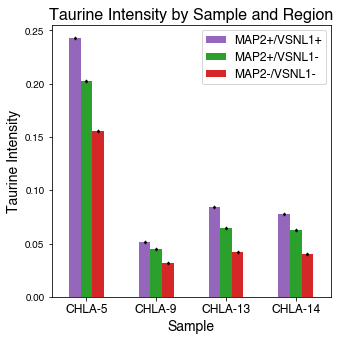

In [9]:
ax = df.plot(kind='bar', yerr=sedf, rot=0, color = color_dict,
        error_kw=dict(ecolor="black", elinewidth=10, marker='o', barsabove=True, lolims=True, uplims=True,capsize=1),
       figsize=(5,5))
ax.set_ylabel("Taurine Intensity", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_title("Taurine Intensity by Sample and Region", fontsize=16)
plt.setp(ax.legend_.get_title(), fontsize=14)
plt.setp(ax.legend_.get_texts(), fontsize=12)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
# fig.tight_layout()
# plt.savefig("taurine_intensity.pdf", dpi=300)